In [1]:
from enum import Enum
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Types of cache
class CacheType(Enum):
    LRU = 1
    RANDOM_EVICTION = 2


DATABASE_OBJECTS = 100 # Number of objects in the database

In [3]:
configurations = {
    "default": (DATABASE_OBJECTS, 10, CacheType.LRU, 5),
    "No Refresh": (DATABASE_OBJECTS, 0, CacheType.LRU, 5),
    "Infinite TTL": (int(DATABASE_OBJECTS / 2), 0, CacheType.LRU, 0),
    "Random Eviction": (int(DATABASE_OBJECTS / 2), 10, CacheType.RANDOM_EVICTION, 5),
    "RE without Refresh": (int(DATABASE_OBJECTS / 2), 0, CacheType.RANDOM_EVICTION, 5),
    "No Refresh (0.5s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 0.5),
    "No Refresh (1.0s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 1),
    "No Refresh (2.0s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 2),
    "No Refresh (3.0s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 3),
    "No Refresh (4.0s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 4),
    "No Refresh (5.0s ttl)": (DATABASE_OBJECTS, 0, CacheType.LRU, 5),
}

experiments = [k.replace(" ", "_").replace("(", "").replace(")", "").replace(".", "_") for k in configurations.keys()]
experiments = [os.path.join("./experiments/",e, "overall_hit_age.csv") for e in experiments if "_ttl" in e]
experiments = [{'ttl': '.'.join(file.split('/')[2].split("_")[2:4]),'data': pd.read_csv(file)} for file in experiments]

In [4]:
stats = [
    {'ttl': e['ttl'],
     'data':  {
         "hit_rate": e['data']['hit_rate'][1], 
         "avg_age": e['data']['avg_age'][1]
     }
    } for e in experiments]
stats

[{'ttl': '0.5s',
  'data': {'hit_rate': 0.458669533255314, 'avg_age': 0.2405818161600988}},
 {'ttl': '1.0s',
  'data': {'hit_rate': 0.6137075818807132, 'avg_age': 0.4914356220831488}},
 {'ttl': '2.0s',
  'data': {'hit_rate': 0.7510045829957603, 'avg_age': 1.0028764694071644}},
 {'ttl': '3.0s',
  'data': {'hit_rate': 0.8151181771596068, 'avg_age': 1.486159537458237}},
 {'ttl': '4.0s',
  'data': {'hit_rate': 0.8521008724556234, 'avg_age': 1.9920411130528224}},
 {'ttl': '5.0s',
  'data': {'hit_rate': 0.877309770620863, 'avg_age': 2.4590330715633857}}]

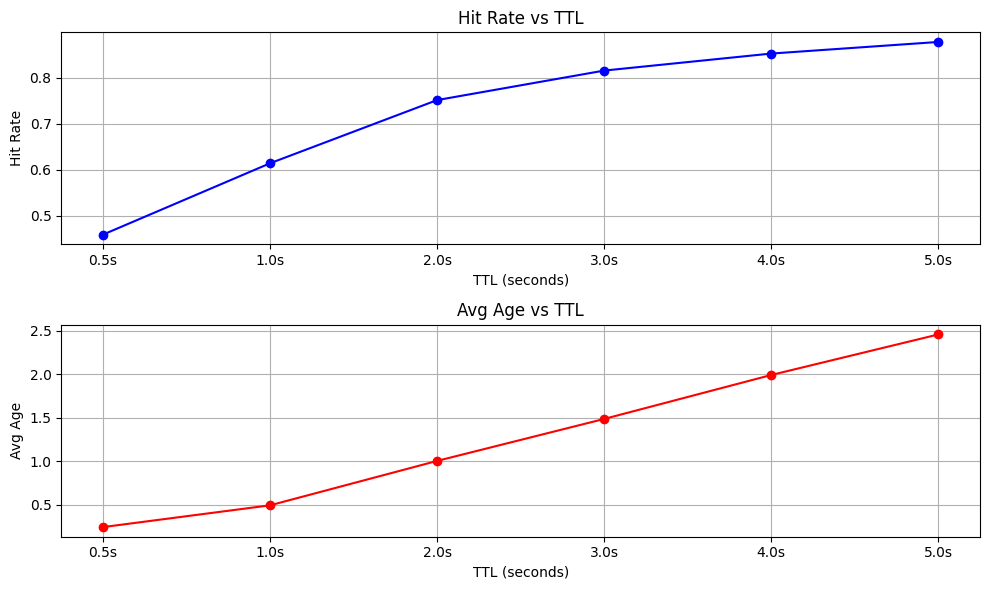

In [5]:
# Extract TTL, hit_rate, and avg_age from data
ttls = [entry['ttl'] for entry in stats]
hit_rates = [entry['data']['hit_rate'] for entry in stats]
avg_ages = [entry['data']['avg_age'] for entry in stats]

# Plotting
plt.figure(figsize=(10, 6))

# Plot hit_rate
plt.subplot(2, 1, 1)
plt.plot(ttls, hit_rates, marker='o', color='b', label='Hit Rate')
plt.xlabel('TTL (seconds)')
plt.ylabel('Hit Rate')
plt.title('Hit Rate vs TTL')
plt.grid(True)

# Plot avg_age
plt.subplot(2, 1, 2)
plt.plot(ttls, avg_ages, marker='o', color='r', label='Avg Age')
plt.xlabel('TTL (seconds)')
plt.ylabel('Avg Age')
plt.title('Avg Age vs TTL')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.savefig("./experiments/hr_and_age_vs_ttl")
plt.show()


In [6]:
pd.DataFrame(hit_rates, columns=["hit_rates"]).to_markdown('./experiments/hit_rates.md')
pd.DataFrame(avg_ages, columns=["avg_ages"]).to_markdown('./experiments/avg_ages.md')

In [7]:
details = [k.replace(" ", "_").replace("(", "").replace(")", "").replace(".", "_") for k in configurations.keys()]
details = [os.path.join("./experiments/",e, "details.csv") for e in details if "_ttl" in e]

In [8]:
details

['./experiments/No_Refresh_0_5s_ttl/details.csv',
 './experiments/No_Refresh_1_0s_ttl/details.csv',
 './experiments/No_Refresh_2_0s_ttl/details.csv',
 './experiments/No_Refresh_3_0s_ttl/details.csv',
 './experiments/No_Refresh_4_0s_ttl/details.csv',
 './experiments/No_Refresh_5_0s_ttl/details.csv']

In [9]:
pd.concat([pd.read_csv(file,index_col="obj_id")['lambda'].rename(f"{'.'.join(file.split('/')[2].split("_")[2:4])}") for file in details], axis=1)

0.5s  1.0s  2.0s  3.0s  4.0s  5.0s
obj_id                                    
1          1     1     1     1     1     1
2          3     3     3     3     3     3
3          1     1     1     1     1     1
4          1     1     1     1     1     1
5          2     2     2     2     2     2
...      ...   ...   ...   ...   ...   ...
95         2     2     2     2     2     2
96         1     1     1     1     1     1
97         1     1     1     1     1     1
98        37    37    37    37    37    37
99         4     4     4     4     4     4

[99 rows x 6 columns]

In [10]:
sum(pd.read_csv("./experiments/No_Refresh_0_5s_ttl/details.csv",index_col="obj_id")['access_count'])

43375